In [1]:
import os
import zipfile

# Define the URL of the dataset and file names
dataset_url = "https://github.com/karoldvl/ESC-50/archive/master.zip"
zip_filename = "ESC-50-master.zip"
output_folder = "ESC-50-master"

# Download the dataset
print("Downloading dataset...")
!wget -O {zip_filename} {dataset_url}

# Extract the dataset
print("Extracting dataset...")
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

# Verify extraction
if os.path.exists(output_folder):
    print(f"Dataset successfully extracted to: {output_folder}")
else:
    print("Extraction failed. Please check the zip file or the path.")


--2025-01-26 08:02:20--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2025-01-26 08:02:20--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-01-26 08:02:20--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘ESC-50-master.zip’

ESC-50-master.zip      

In [ ]:
import os

# List the top-level files and directories in the extracted folder
print("Listing contents of the dataset folder:")
for item in os.listdir(output_folder):
    print(item)


Listing contents of the dataset folder:
tests
meta
requirements.txt
.github
pytest.ini
.gitignore
audio
.circleci
LICENSE
esc50.gif
README.md


##meta

In [ ]:
# List the contents of the "meta" folder
meta_folder = os.path.join(output_folder, "meta")
print("Contents of 'meta' folder:")
for item in os.listdir(meta_folder):
    print(item)

# Preview the first few lines of the main meta file (likely 'esc50.csv')
meta_file = os.path.join(meta_folder, "esc50.csv")
if os.path.exists(meta_file):
    print("\nPreview of the 'esc50.csv' file:")
    with open(meta_file, 'r') as f:
        for i in range(10):  # Read first 10 lines
            print(f.readline().strip())
else:
    print("Meta file 'esc50.csv' not found!")


Contents of 'meta' folder:
esc50.csv
esc50-human.xlsx

Preview of the 'esc50.csv' file:
filename,fold,target,category,esc10,src_file,take
1-100032-A-0.wav,1,0,dog,True,100032,A
1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
1-101404-A-34.wav,1,34,can_opening,False,101404,A
1-103298-A-9.wav,1,9,crow,False,103298,A


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
meta_file = os.path.join(meta_folder, "esc50.csv")
esc50_df = pd.read_csv(meta_file)

# Display basic information about the dataset
print("Basic info about the dataset:")
print(esc50_df.info())

# Check the unique categories and their counts
print("\nUnique categories and their counts:")
print(esc50_df['category'].value_counts())

# Display a preview of the dataset
print("\nPreview of the dataset:")
print(esc50_df.head())


Basic info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None

Unique categories and their counts:
category
dog                 40
glass_breaking      40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
snoring             40
chirping_birds      40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          

In [ ]:
esc50_df['fold'].unique()

array([1, 2, 3, 4, 5])

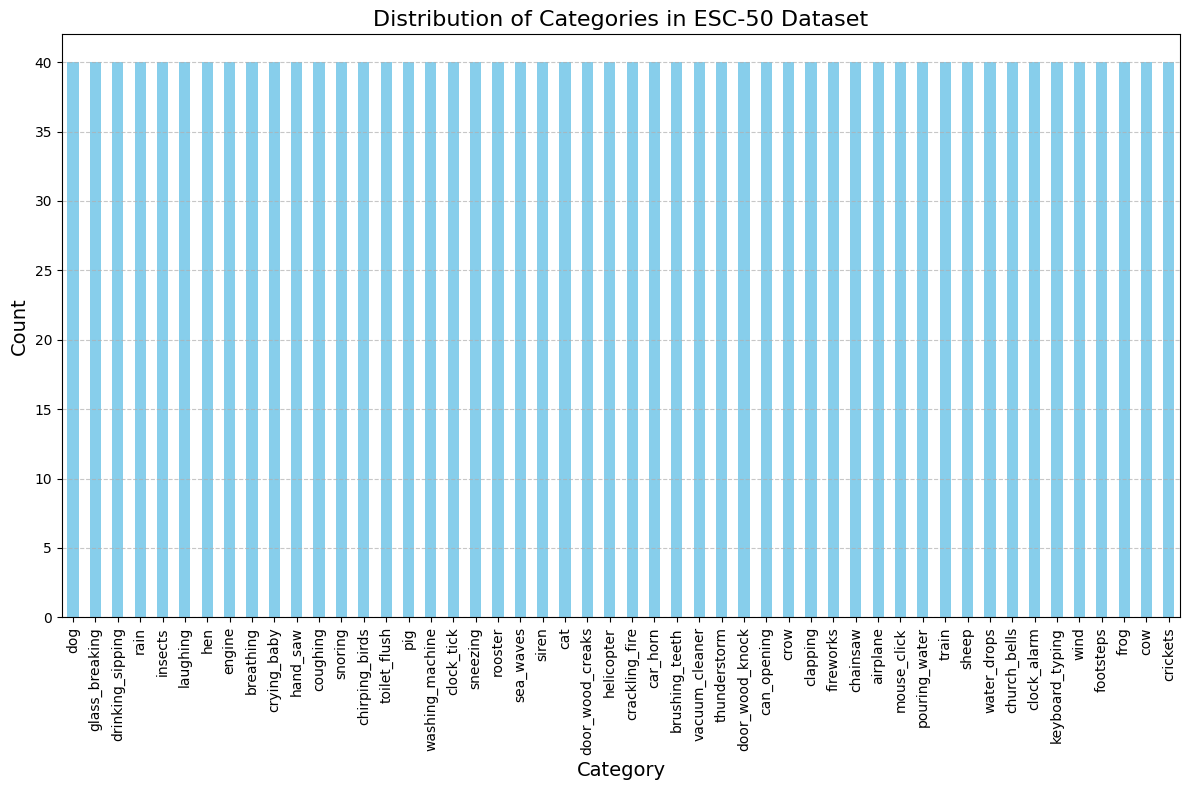

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of categories
plt.figure(figsize=(12, 8))
esc50_df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories in ESC-50 Dataset', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## audio + EDA on first obs

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Select a sample audio file (e.g., the first one in the dataset)
audio_file = os.path.join(output_folder, 'audio', esc50_df.iloc[0]['filename'])

# Load the audio file
y, sr = librosa.load(audio_file, sr=None)

# Play the audio
print(f"Playing audio: {esc50_df.iloc[0]['filename']} (Category: {esc50_df.iloc[0]['category']})")
ipd.Audio(audio_file)



Playing audio: 1-100032-A-0.wav (Category: dog)


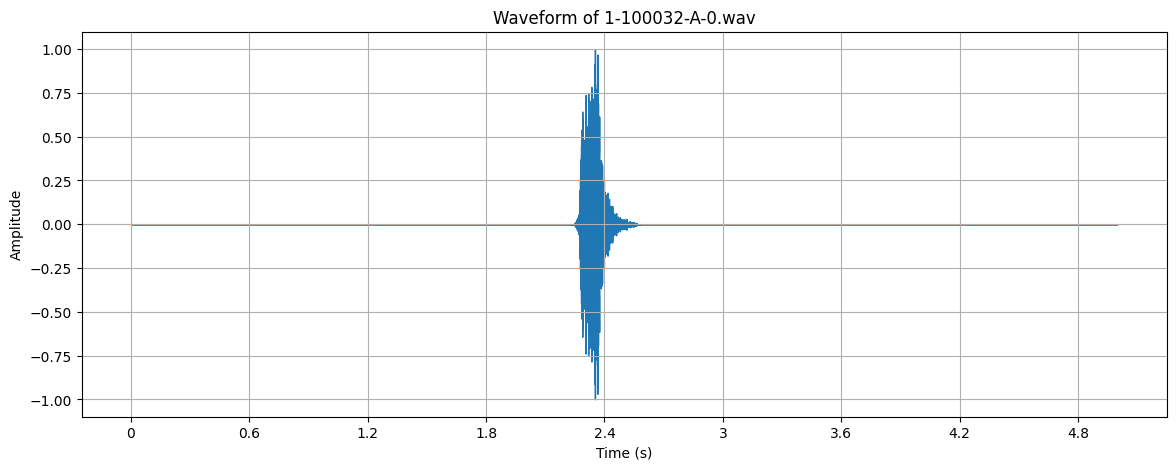

In [ ]:
# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {esc50_df.iloc[0]['filename']}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


<ipython-input-9-62f4691831c3>:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)  # Short-time Fourier transform (STFT)


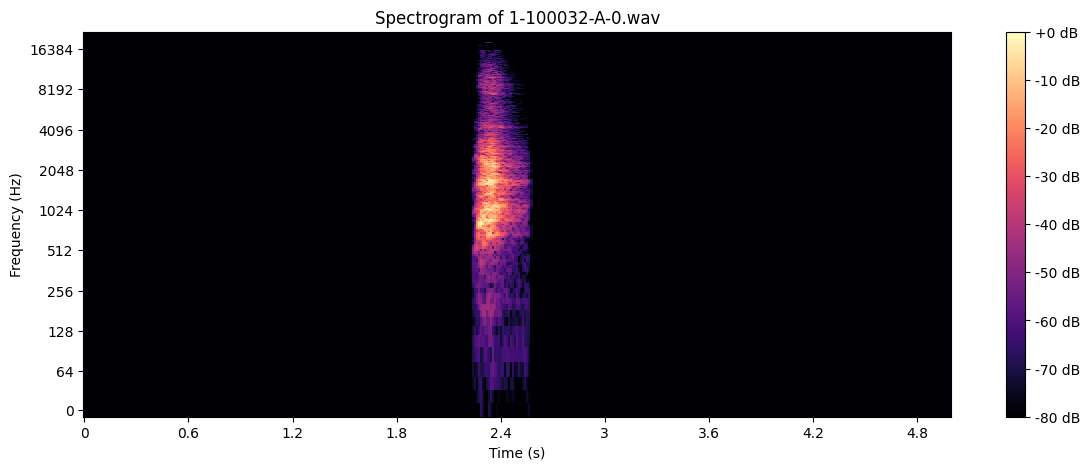

In [ ]:
import numpy as np

# Compute and plot the spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)  # Short-time Fourier transform (STFT)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram of {esc50_df.iloc[0]['filename']}")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


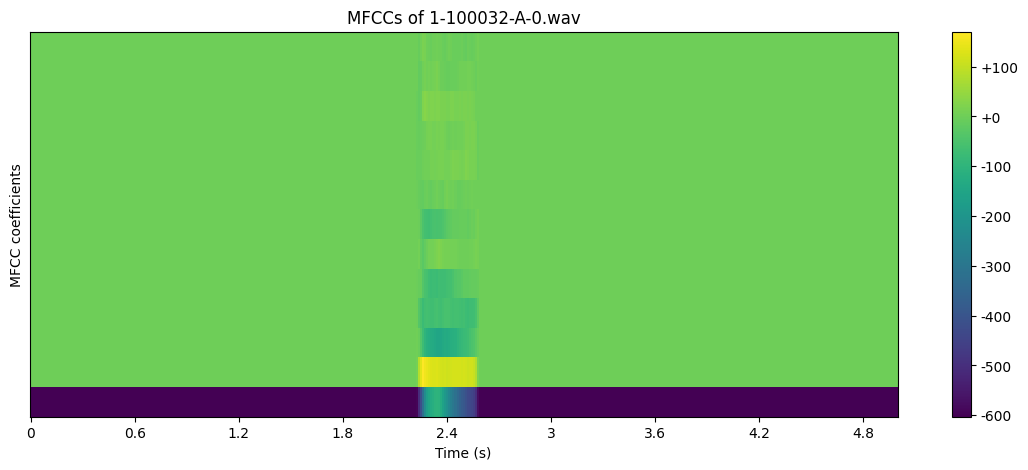

In [ ]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title(f"MFCCs of {esc50_df.iloc[0]['filename']}")
plt.xlabel("Time (s)")
plt.ylabel("MFCC coefficients")
plt.show()


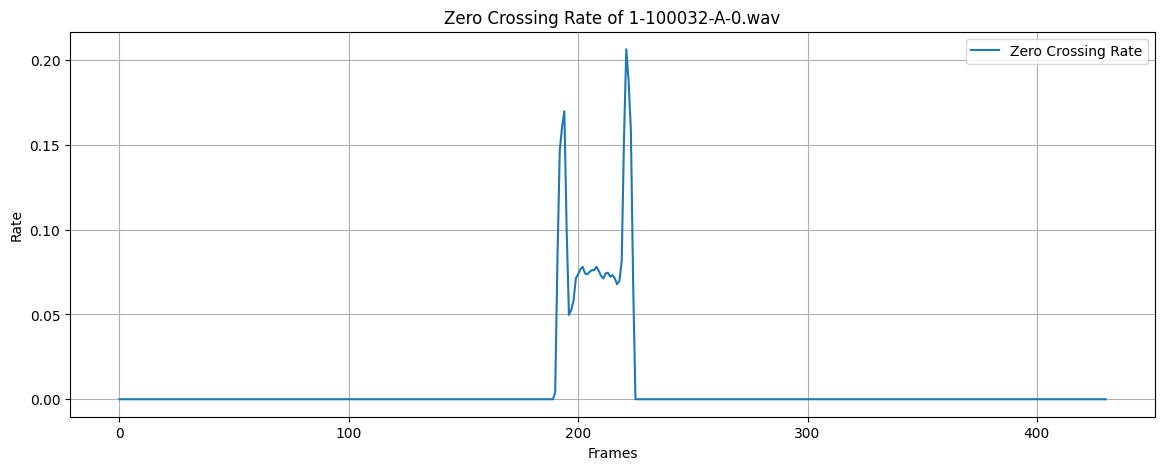

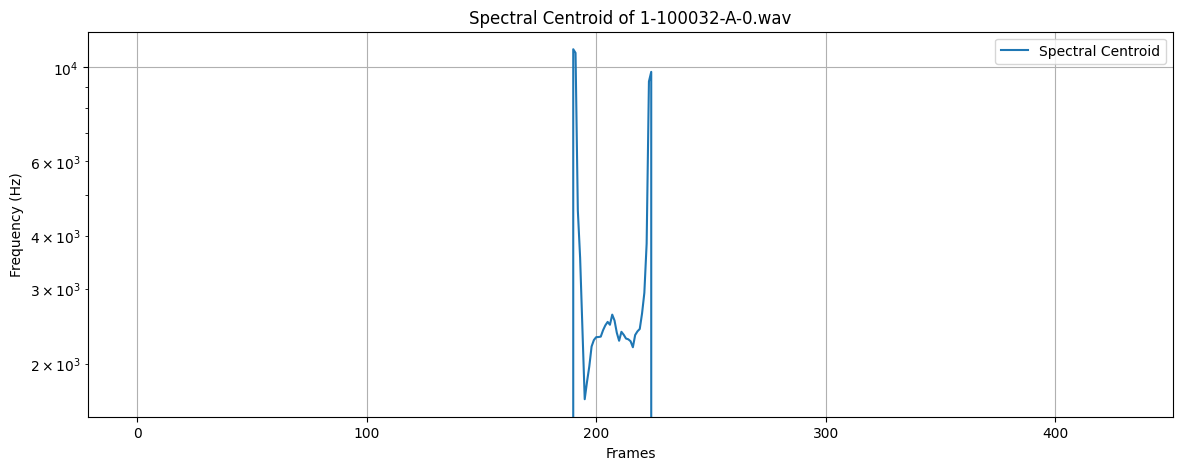

In [ ]:
# Calculate Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)

# Calculate Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Plot ZCR
plt.figure(figsize=(14, 5))
plt.plot(zcr[0], label='Zero Crossing Rate')
plt.title(f"Zero Crossing Rate of {esc50_df.iloc[0]['filename']}")
plt.xlabel("Frames")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

# Plot Spectral Centroid
plt.figure(figsize=(14, 5))
plt.semilogy(spectral_centroid[0], label='Spectral Centroid')
plt.title(f"Spectral Centroid of {esc50_df.iloc[0]['filename']}")
plt.xlabel("Frames")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Define a function to extract features from a single audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Calculate features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    zcr = librosa.feature.zero_crossing_rate(y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # Aggregate features (mean and std)
    features = {
        'mfcc_mean': mfccs.mean(axis=1).tolist(),
        'mfcc_std': mfccs.std(axis=1).tolist(),
        'zcr_mean': zcr.mean(),
        'zcr_std': zcr.std(),
        'spectral_centroid_mean': spectral_centroid.mean(),
        'spectral_centroid_std': spectral_centroid.std(),
        'spectral_bandwidth_mean': spectral_bandwidth.mean(),
        'spectral_bandwidth_std': spectral_bandwidth.std(),
    }
    return features

# Extract features for all audio files
features_list = []
for i, row in esc50_df.iterrows():
    file_path = os.path.join(output_folder, 'audio', row['filename'])
    features = extract_features(file_path)
    features['category'] = row['category']  # Add the category for later analysis
    features['filename'] = row['filename']  # Keep the filename for reference
    features['fold'] = row['fold']  # Keep the fold for later analysis
    features_list.append(features)

# Convert features into a DataFrame
import pandas as pd
features_df = pd.DataFrame(features_list)

# Expand the MFCC features into separate columns
mfcc_means = pd.DataFrame(features_df['mfcc_mean'].tolist(), columns=[f'mfcc_mean_{i}' for i in range(13)])
mfcc_stds = pd.DataFrame(features_df['mfcc_std'].tolist(), columns=[f'mfcc_std_{i}' for i in range(13)])
features_df = pd.concat([features_df, mfcc_means, mfcc_stds], axis=1).drop(columns=['mfcc_mean', 'mfcc_std'])

# Save or display the features DataFrame
features_df.head()


,zcr_mean,zcr_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,category,filename,fold,mfcc_mean_0,...,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12
0,0.007329,0.027503,273.927703,1168.622069,255.475244,976.942865,dog,1-100032-A-0.wav,1,-581.739929,...,15.894979,12.837584,2.839211,9.407924,1.725599,2.647743,2.202942,4.135943,1.731832,1.732612
1,0.157994,0.022784,4042.281204,536.421310,2643.109696,172.288741,chirping_birds,1-100038-A-14.wav,1,-254.936310,...,13.717227,9.443714,11.233823,10.637623,10.935958,7.955853,8.934217,10.558152,7.269026,6.993200
2,0.199469,0.029614,4410.555928,391.361066,4051.643196,162.486199,vacuum_cleaner,1-100210-A-36.wav,1,-30.461212,...,4.879633,5.098261,4.306431,4.915914,4.160092,5.192626,6.609114,4.546207,4.543290,4.966105
3,0.202079,0.021309,4370.451735,223.974376,3949.239193,115.658679,vacuum_cleaner,1-100210-B-36.wav,1,-31.114239,...,5.528185,4.816660,4.880049,4.512170,5.154856,6.175560,5.149764,5.571711,4.659288,6.084853
4,0.027574,0.010662,2075.738865,585.039587,3455.603120,501.156250,thunderstorm,1-101296-A-19.wav,1,-466.622101,...,6.995115,7.750019,7.584086,6.499315,5.029333,4.783904,4.213262,4.849271,4.231527,4.358825


### Why use 13 MFCC coefficients?
The first 13 Mel-Frequency Cepstral Coefficients (MFCC) are commonly used in audio analysis because they effectively capture the most relevant information about the timbre of a sound. This choice balances detail and computational efficiency, as higher coefficients usually contribute less meaningful information. It is a standard practice in tasks like speech and audio classification.


Aggregated features by category (mean):
                zcr_mean   zcr_std  spectral_centroid_mean  \
category                                                     
airplane        0.032504  0.011018             1318.142037   
breathing       0.069408  0.041087             2539.142713   
brushing_teeth  0.138740  0.049961             4755.930954   
can_opening     0.084478  0.086484             3443.963099   
car_horn        0.042158  0.028320             1695.880424   

                spectral_centroid_std  spectral_bandwidth_mean  \
category                                                         
airplane                   308.278232              1713.237954   
breathing                 1086.466561              2825.266841   
brushing_teeth            1016.801248              3969.966995   
can_opening               2145.448077              3068.595371   
car_horn                   869.415761              2061.998933   

                spectral_bandwidth_std  fold  mfcc_mean_0  mfc

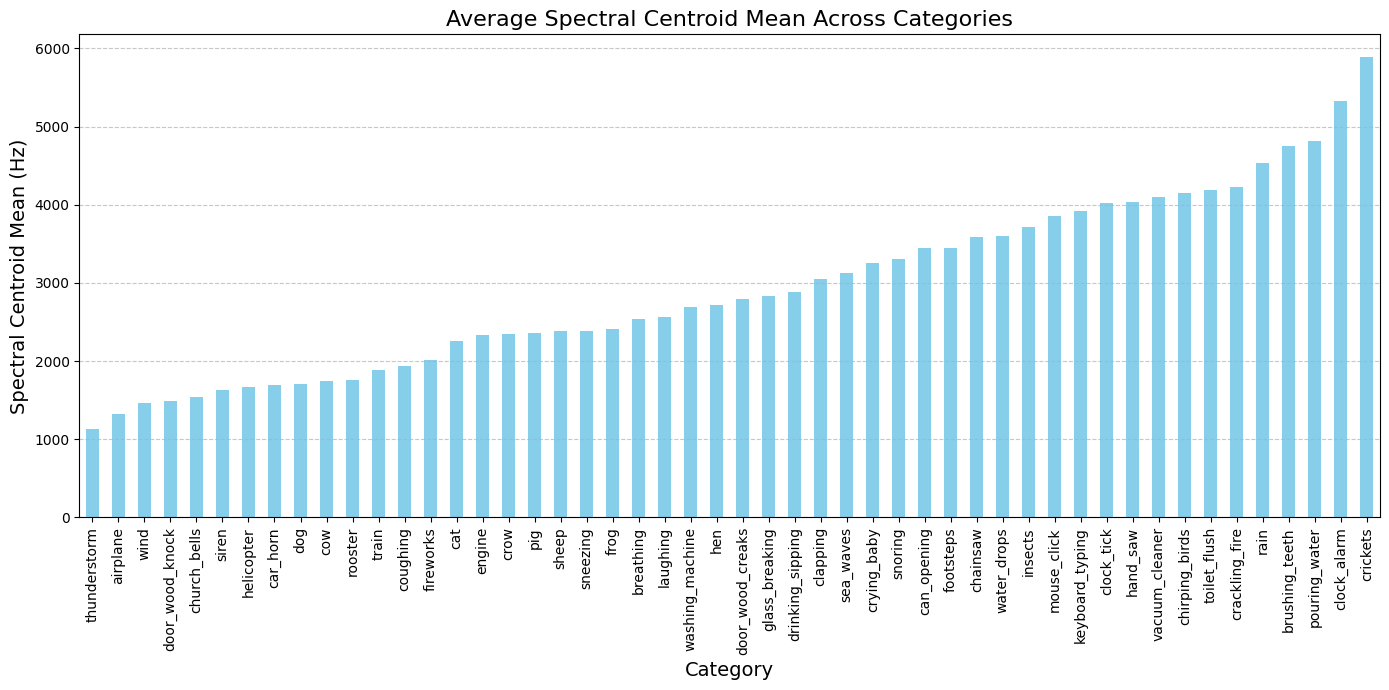

In [ ]:
# Select only numeric columns for aggregation
numeric_columns = features_df.select_dtypes(include=['float64', 'int64']).columns

# Group the features by category and compute the mean
agg_features = features_df.groupby('category')[numeric_columns].mean()

# Preview the aggregated features
print("Aggregated features by category (mean):")
print(agg_features.head())

# Plot an example: spectral_centroid_mean across categories
plt.figure(figsize=(14, 7))
agg_features['spectral_centroid_mean'].sort_values().plot(kind='bar', color='skyblue')
plt.title("Average Spectral Centroid Mean Across Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Spectral Centroid Mean (Hz)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


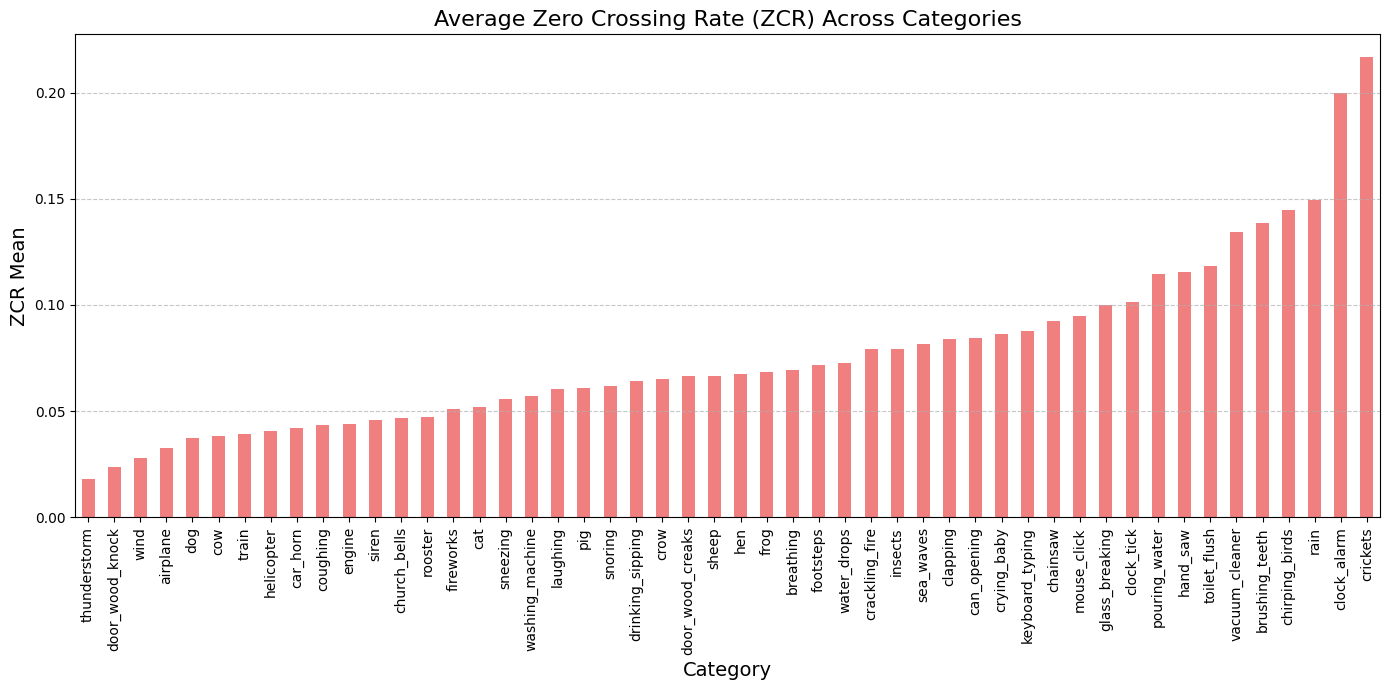

In [ ]:
# Plot another characteristic: zcr_mean across categories
plt.figure(figsize=(14, 7))
agg_features['zcr_mean'].sort_values().plot(kind='bar', color='lightcoral')
plt.title("Average Zero Crossing Rate (ZCR) Across Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("ZCR Mean", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Save the features DataFrame as a Parquet file
features_df.to_parquet("esc50_features_extracted.parquet", index=False)

print("Features saved successfully as 'esc50_features_extracted.parquet'.")


Features saved successfully as 'esc50_features_extracted.parquet'.
